In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import EfficientNetB3, VGG16, ResNet50

In [2]:
base_dir = './data/telemoji'
train_dir = os.path.join(base_dir, 'train_kakao')
validation_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    classes=['disgust', 'angry', 'fear', 'happy', 'sad', 'neutral', 'suprise'],
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=20,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['disgust', 'angry', 'fear', 'happy', 'sad', 'neutral', 'suprise'],
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=20,
    class_mode='categorical'
)

Found 7231 images belonging to 7 classes.
Found 2660 images belonging to 7 classes.


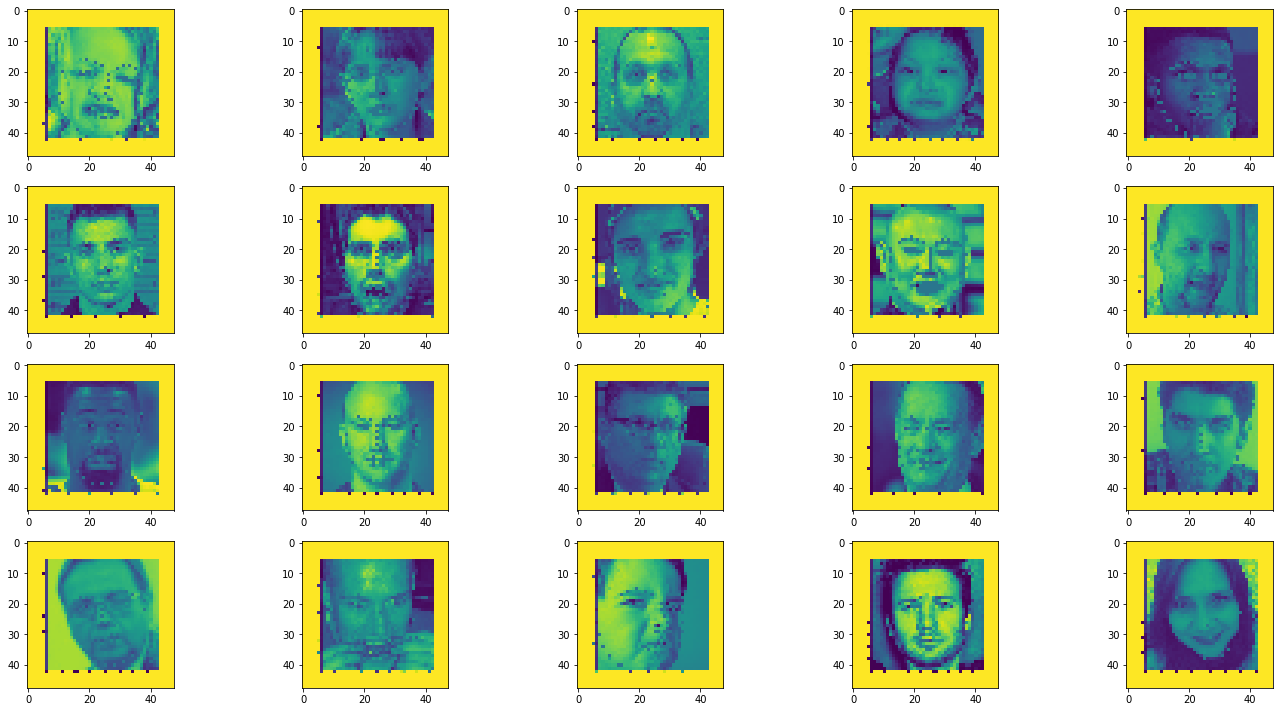

In [3]:
fig = plt.figure(figsize=(20,10))
fig_arr = list()

for i in range(20):
    fig_arr.append(fig.add_subplot(4,5,i+1))
  
for x_data, t_data in train_generator:
    for idx, img_data in enumerate(x_data):
        fig_arr[idx].imshow(img_data)
    break 
    
plt.tight_layout()
plt.show()

In [4]:
# pretrained network
model_base = VGG16(include_top=False, 
                            weights='imagenet', input_shape=(48,48,3))
# model_base의 weight학습을 동결
model_base.trainable=False

model_base.summary()

ResourceExhaustedError: OOM when allocating tensor with shape[3,3,512,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]

In [15]:
model = Sequential()

# pretrained network를 우리의 모델 앞에 추가
model.add(model_base)

model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.summary()

model.compile(optimizer=RMSprop(learning_rate=1e-3), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'model_base' is not defined

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)